**Load and Preprocess the data**

In [1]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sanjanabh127","key":"549fef042f8340420eb9e23ae3074a94"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000           7586        192  1.0              
wardabilal/spotify-global-music-dataset-20092025                Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000           1387         26  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                    5941  2025-10-26 07:51:53.380000           7218         99  1.0              


In [9]:
!kaggle datasets list -s melanoma

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
drscarlat/melanoma                                         melanoma                                         5649024274  2018-12-02 04:01:51.513000           6167         76  0.5625           
minnieliang/melanoma                                       melanoma                                             151848  2020-08-08 23:32:31.223000            204          7  0.29411766       
wanderdust/skin-lesion-analysis-toward-melanoma-detection  Melanoma Detection Dataset                      12143517511  2020-05-12 13:15:53.090000           8388        106  0.875            
louise2001/melanoma                     

In [14]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
  0% 0.00/98.7M [00:00<?, ?B/s]
100% 98.7M/98.7M [00:00<00:00, 1.77GB/s]


In [15]:
!unzip melanoma.zip -d melanoma_data

Streaming output truncated to the last 5000 lines.
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_data/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: melanoma_data/melanoma_c

In [ ]:
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
melanoma-cancer-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
BASE_DIR="/content/melanoma_data"

In [21]:
TRAIN_DIR=os.path.join(BASE_DIR,"train")
TEST_DIR=os.path.join(BASE_DIR,"test")

In [22]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [25]:
train_dataget=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [26]:
test_dataget=ImageDataGenerator(
    rescale=1./255
)

In [30]:
TRAIN_DIR="/content/melanoma_data/melanoma_cancer_dataset/train"
TEST_DIR="/content/melanoma_data/melanoma_cancer_dataset/test"

In [34]:
train_dataget=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
)

train_generator=train_dataget.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 9605 images belonging to 2 classes.


In [36]:
test_dataget=ImageDataGenerator(rescale=1./255)

test_generator=test_dataget.flow_from_directory(
    directory=TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [37]:
print("Class Mapping :", train_generator.class_indices)

Class Mapping : {'benign': 0, 'malignant': 1}


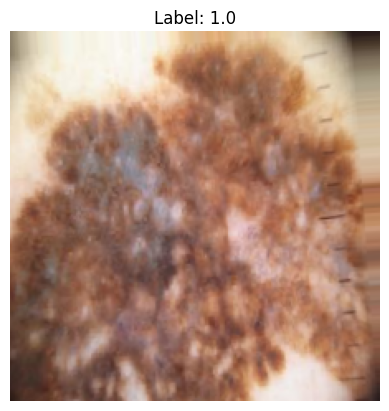

In [44]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)


plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

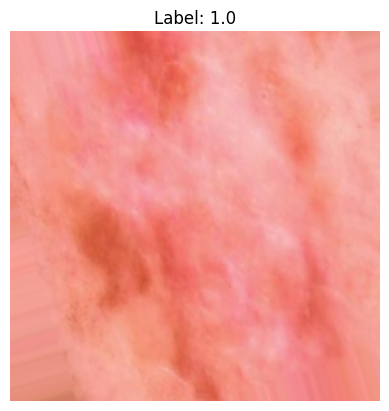

In [43]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)


plt.imshow(images[1])
plt.title(f"Label: {labels[1]}")
plt.axis('off')
plt.show()

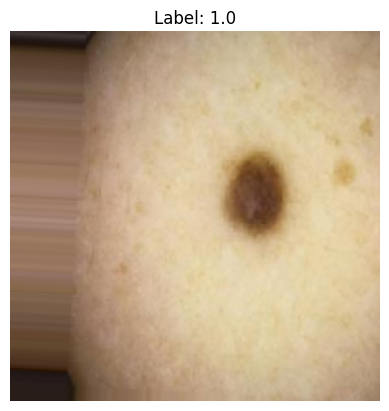

In [42]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)

plt.imshow(images[2])
plt.title(f"Label: {labels[2]}")
plt.axis('off')
plt.show()

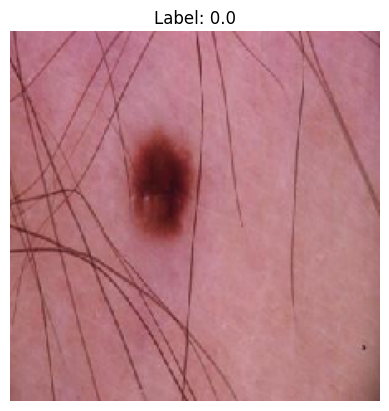

In [45]:
import matplotlib.pyplot as plt
images, labels = next(test_generator)

plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

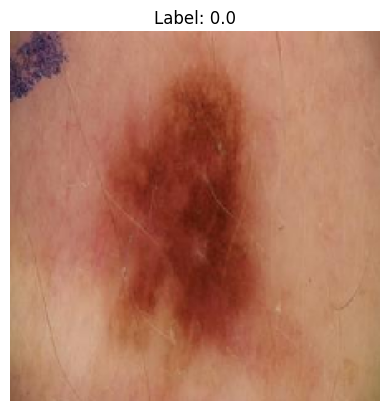

In [46]:
import matplotlib.pyplot as plt
images, labels = next(test_generator)

plt.imshow(images[1])
plt.title(f"Label: {labels[1]}")
plt.axis('off')
plt.show()

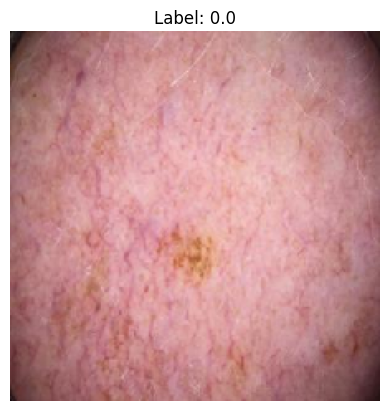

In [47]:
import matplotlib.pyplot as plt
images, labels = next(test_generator)

plt.imshow(images[1])
plt.title(f"Label: {labels[1]}")
plt.axis('off')
plt.show()

**EDA**

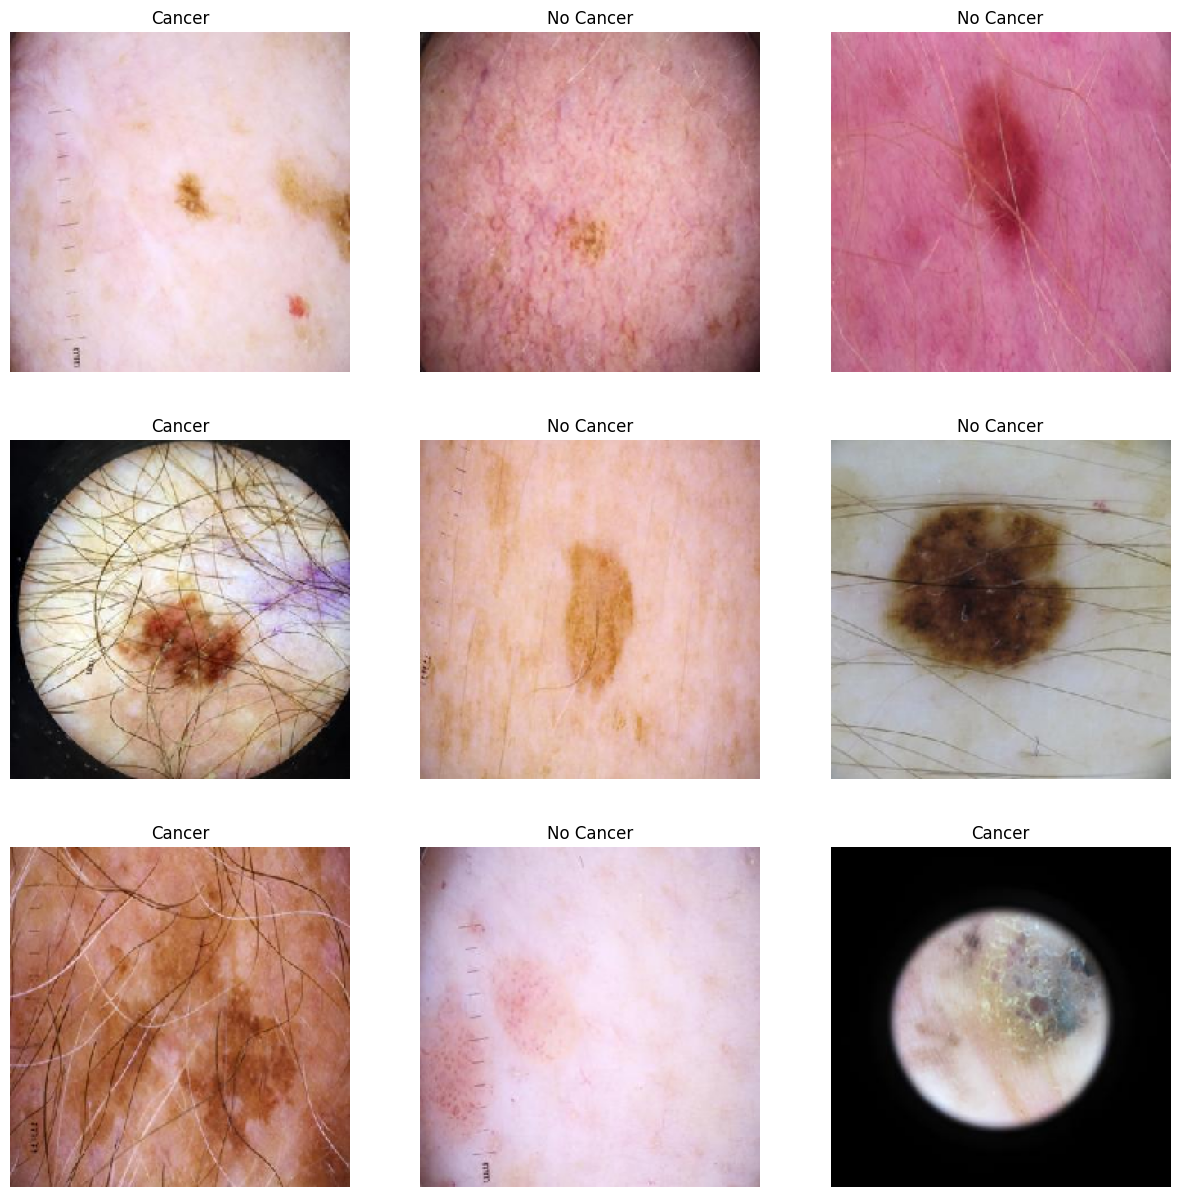

In [51]:
def plot_images(generator):
  iamges,labels=next(generator)
  plt.figure(figsize=(15,15))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title('Cancer'if labels[i]==1 else 'No Cancer')
    plt.axis('off')
  plt.show()
plot_images(train_generator)


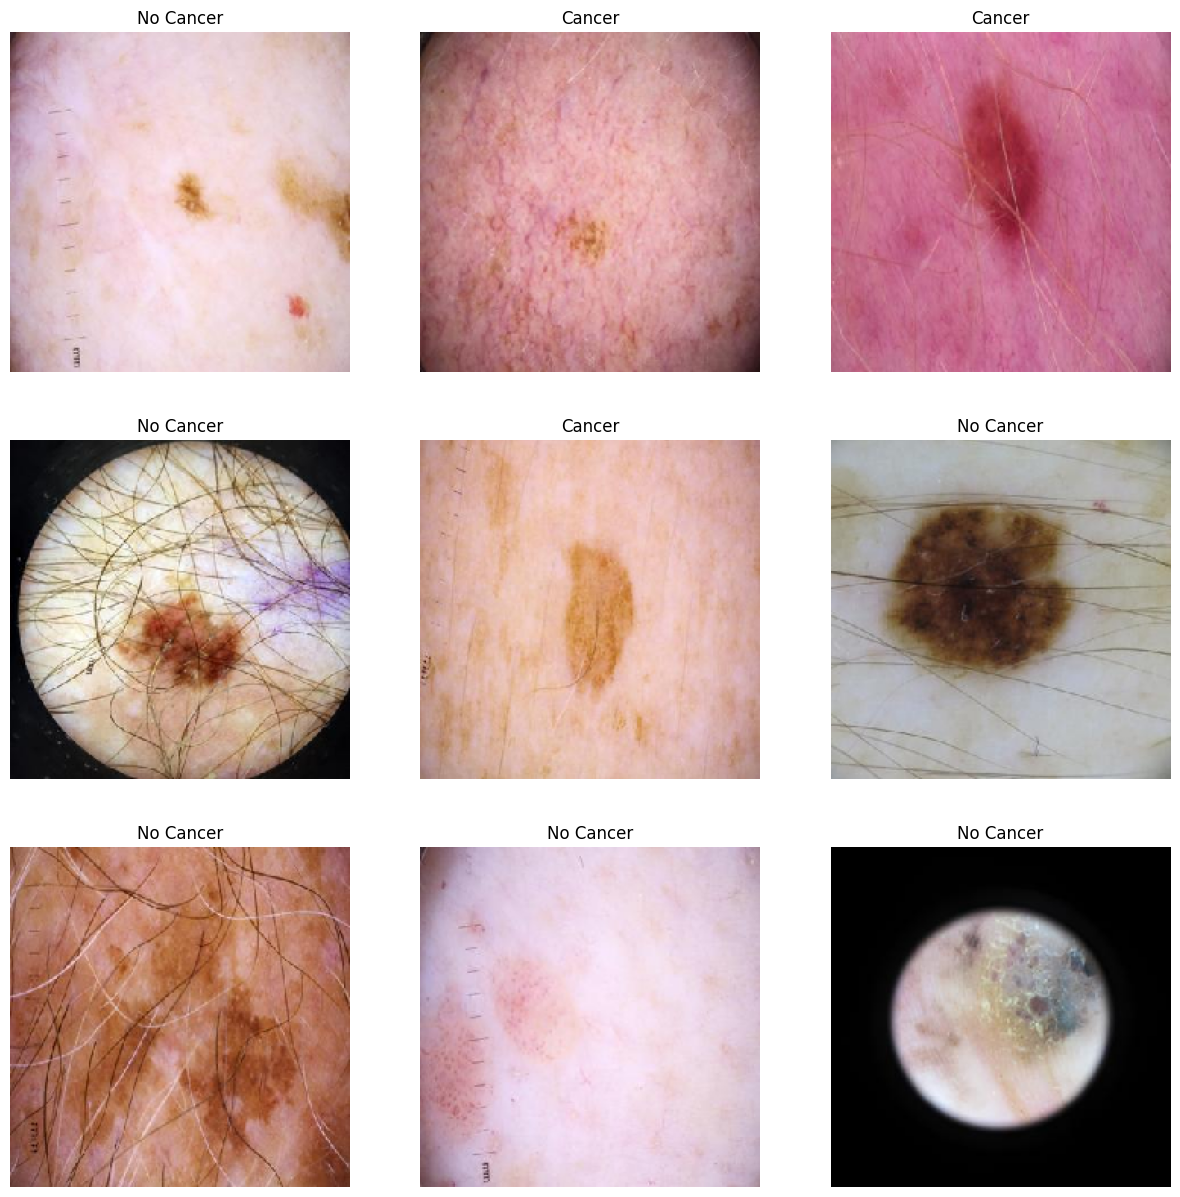

In [50]:
def plot_images(generator):
  iamges,labels=next(generator)
  plt.figure(figsize=(15,15))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title('Cancer'if labels[i]==1 else 'No Cancer')
    plt.axis('off')
  plt.show()
plot_images(test_generator)

**Building CNN**

In [59]:
from tensorflow.keras import layers,models
model=models.Sequential( [
    #in CNN we have 2 parts feature extraction and Classification of fully connected layers
    #feature extraction
    #1st convolution layer
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),

    #2nd convolution layer
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #3rd convolution layer
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #flatten before classification
    layers.Flatten(), # Added comma here

    #fully connected part
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
] )

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

**Model Evaluation and Training**

In [62]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
    )
lr_schedular=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping,lr_schedular]
)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 118s 393ms/step - accuracy: 0.8295 - loss: 0.3901 - val_accuracy: 0.8750 - val_loss: 0.2962 - learning_rate: 0.0010
Epoch 2/10
  1/300 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.8125 - loss: 0.4305

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8125 - loss: 0.4305 - val_accuracy: 0.8800 - val_loss: 0.2847 - learning_rate: 0.0010
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 114s 379ms/step - accuracy: 0.8531 - loss: 0.3415 - val_accuracy: 0.8478 - val_loss: 0.3641 - learning_rate: 0.0010
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.4085 - val_accuracy: 0.8518 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 113s 378ms/step - accuracy: 0.8661 - loss: 0.3177 - val_accuracy: 0.8911 - val_loss: 0.2773 - learning_rate: 0.0010
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.3553 - val_accuracy: 0.8931 - val_loss: 0.2770 - learning_rate: 0.0010
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 115s 381ms/step - accuracy: 0.8690 - loss: 0.3027 - val_accuracy: 0.8790 - val_loss: 0.2712 - learning_rate: 0.0010
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.1554 -

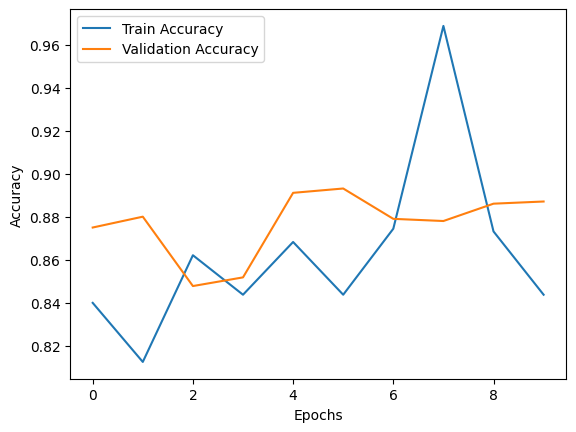

In [63]:
model.save("CNN_cancer_model.h5")

#save model
model.save("Skin_Cancer.h5")

#plotting training history
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Classification Report and Confusion Matrix**

In [65]:
test_prediction=model.predict(test_generator,steps=test_generator.samples //BATCH_SIZE,verbose=1)
test_pred_labels=(test_prediction>0.5).astype(int)
test_true_labels=test_generator.classes[:len(test_pred_labels)]
test_true_labels

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
print(classification_report(test_true_labels,test_pred_labels))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53       500
           1       0.52      0.51      0.51       492

    accuracy                           0.52       992
   macro avg       0.52      0.52      0.52       992
weighted avg       0.52      0.52      0.52       992



<Axes: >

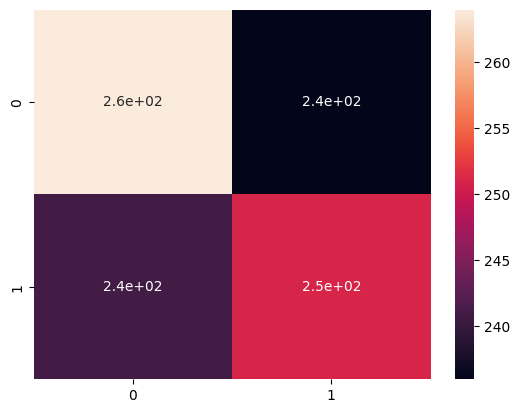

In [68]:
cm=confusion_matrix(test_true_labels,test_pred_labels)
sns.heatmap(cm,annot=True)

**Or**

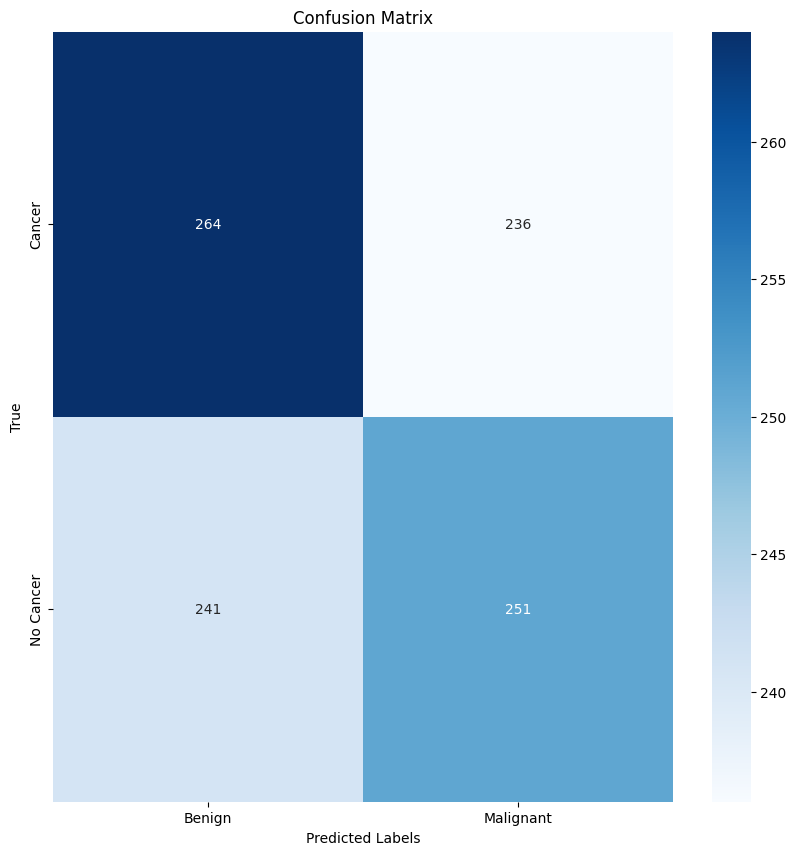

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Benign','Malignant'],yticklabels=['Cancer','No Cancer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Predictive System**

In [71]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model=load_model("/content/Skin_Cancer.h5")

In [72]:
def predict_skin_cancer(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    class_label = "Malignant" if prediction > 0.5 else "Benign"

    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

**Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


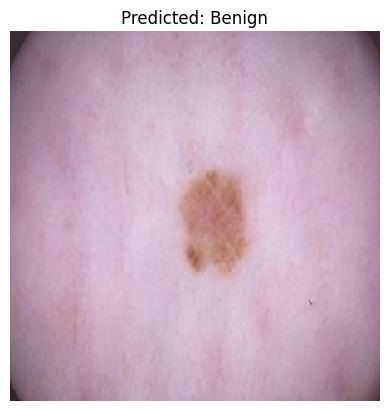

In [74]:
predict_skin_cancer("/content/melanoma_data/melanoma_cancer_dataset/test/benign/melanoma_10000.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


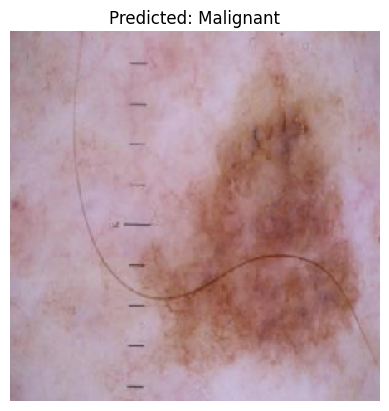

In [75]:
predict_skin_cancer("/content/melanoma_data/melanoma_cancer_dataset/test/malignant/melanoma_10105.jpg", model)